In [1]:
import yt
from math import sqrt,floor
import cmasher as cmr


In [2]:
units_override = {"length_unit": (1.0, "cm"),
                  "time_unit": (1.0, "s"),
                  "mass_unit": (1.0, "g")
                  }

parameters_noPer = {
    "periodicity": (False,False,False)
}

parameters_withPer = {
    "periodicity": (False,True,False)
}

In [3]:
ds = yt.load("/ptmp/mpa/bseidl/Simulation-Runs/2023-06-12_multiCloud_Series3-2_64clouds/data/id0/cloud.0000.vtk", units_override=units_override, parameters = parameters_withPer)

def add_units(ds0, r_cloud, drat, T_cloud, M_wind):
    gamma = 5/3
    
    v_wind = M_wind * sqrt(drat) * sqrt(gamma*T_cloud)
    
    t_cc = sqrt(drat) * r_cloud / v_wind
    
    rho_cloud = drat
    
    p0 = T_cloud * rho_cloud
    
    print(gamma,v_wind,t_cc,rho_cloud,p0)
    
    ds0.define_unit("t_cc", t_cc * yt.units.second, tex_repr = r't/t_{\rm cc}')
    ds0.define_unit("r_cl", r_cloud * yt.units.centimetre, tex_repr = r"r/r_{\rm cl}")
    ds0.define_unit("v_wind", v_wind * yt.units.centimetre/yt.units.second, tex_repr = r"v/v_{\rm wind}")
    ds0.define_unit("rho_cl", rho_cloud* yt.units.gram/yt.units.centimetre**3, tex_repr = r"\rho/\rho_{\rm cl}")
    ds0.define_unit("p0", p0* yt.units.dyn/yt.units.centimetre**2, tex_repr = r"p/p_{0}")
    ds0.define_unit("T_cl", T_cloud* yt.units.centimetre*yt.units.dyn/yt.units.gram, tex_repr = r"T/T_{\rm cl}")
    
add_units(ds, 5, 100, 1, 1.5)

def _ath_temperature(field,data):
    return data["pressure"]/data["density"]

ds.add_field(
    ("athena", "temp"),
    units = "T_cl",
    function = _ath_temperature,
    sampling_type = "cell"
)


yt : [INFO     ] 2023-06-12 22:53:51,584 Temporarily setting domain_right_edge = -domain_left_edge. This will be corrected automatically if it is not the case.


yt : [WARNING  ] 2023-06-12 22:53:51,648 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2023-06-12 22:53:51,649 Overriding length_unit: 1.0 cm.
yt : [INFO     ] 2023-06-12 22:53:51,651 Overriding time_unit: 1.0 s.
yt : [INFO     ] 2023-06-12 22:53:51,652 Overriding mass_unit: 1.0 g.
yt : [INFO     ] 2023-06-12 22:53:51,710 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-06-12 22:53:51,711 Parameters: domain_dimensions         = [480 480 480]
yt : [INFO     ] 2023-06-12 22:53:51,714 Parameters: domain_left_edge          = [-150. -150. -150.]
yt : [INFO     ] 2023-06-12 22:53:51,715 Parameters: domain_right_edge         = [150. 150. 150.]
yt : [INFO     ] 2023-06-12 22:53:51,716 Parameters: cosmological_simulation   = 0


1.6666666666666667 19.364916731037084 2.581988897471611 100 100


In [22]:
#dd['athena', 'density']
#dd['athena', 'density'].to('rho_cl')
ds.length_unit
#ds.length_unit.to("r_cl")
#print(ds.domain_left_edge[0])

unyt_quantity(1., 'cm')

In [26]:
print(dir(ds.fields.gas))
print(ds.field_list)


['angular_momentum_magnitude', 'angular_momentum_x', 'angular_momentum_y', 'angular_momentum_z', 'averaged_density', 'baroclinic_vorticity_magnitude', 'baroclinic_vorticity_x', 'baroclinic_vorticity_y', 'baroclinic_vorticity_z', 'cell_mass', 'cell_volume', 'courant_time_step', 'cutting_plane_velocity_x', 'cutting_plane_velocity_y', 'cutting_plane_velocity_z', 'density', 'density_gradient_magnitude', 'density_gradient_x', 'density_gradient_y', 'density_gradient_z', 'dx', 'dy', 'dynamical_time', 'dz', 'four_velocity_magnitude', 'four_velocity_t', 'four_velocity_x', 'four_velocity_y', 'four_velocity_z', 'jeans_mass', 'kT', 'kinetic_energy_density', 'lorentz_factor', 'mach_number', 'mass', 'mean_molecular_weight', 'momentum_density_x', 'momentum_density_y', 'momentum_density_z', 'momentum_x', 'momentum_y', 'momentum_z', 'number_density', 'path_element_x', 'path_element_y', 'path_element_z', 'pressure', 'pressure_gradient_magnitude', 'pressure_gradient_x', 'pressure_gradient_y', 'pressure_g

In [4]:
print(ds.current_time.in_units("t_cc"))
formattime = "{:.2f}".format(ds.current_time)
print(str(formattime))
print(floor(float(str(formattime).removesuffix(" code_time"))))
print(floor(float(str(formattime).removesuffix(" code_time")))*2-1)

0.0 t_cc
0.00 code_time
0
-1


In [21]:
w = float(ds.domain_width.to('r_cl')[0].value)
h = float(ds.domain_width.to('r_cl')[2].value) 
print(w,h)

85.0 20.0


124.99999999999999 59.99999999999999


yt : [INFO     ] 2023-06-12 23:12:29,155 Projection completed
yt : [INFO     ] 2023-06-12 23:12:29,157 xlim = -150.000000 475.000000
yt : [INFO     ] 2023-06-12 23:12:29,158 ylim = -150.000000 150.000000
yt : [INFO     ] 2023-06-12 23:12:29,159 xlim = -150.000000 475.000000
yt : [INFO     ] 2023-06-12 23:12:29,159 ylim = -150.000000 150.000000
yt : [INFO     ] 2023-06-12 23:12:29,161 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2023-06-12 23:13:16,249 Projection completed
yt : [INFO     ] 2023-06-12 23:13:16,254 xlim = -150.000000 475.000000
yt : [INFO     ] 2023-06-12 23:13:16,258 ylim = -150.000000 150.000000
yt : [INFO     ] 2023-06-12 23:13:16,259 xlim = -150.000000 475.000000
yt : [INFO     ] 2023-06-12 23:13:16,260 ylim = -150.000000 150.000000
yt : [INFO     ] 2023-06-12 23:13:16,261 Making a fixed resolution buffer of (('athena', 'temp')) 800 by 800



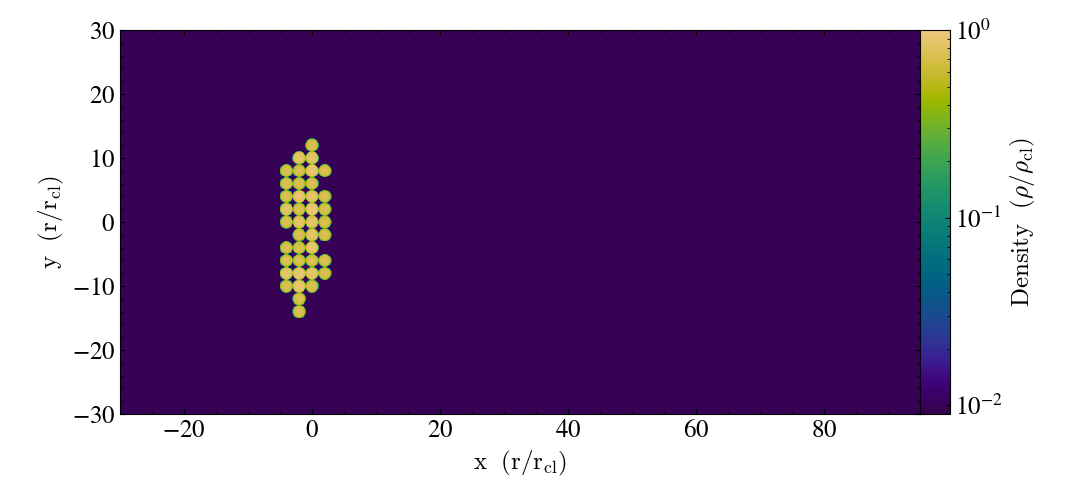


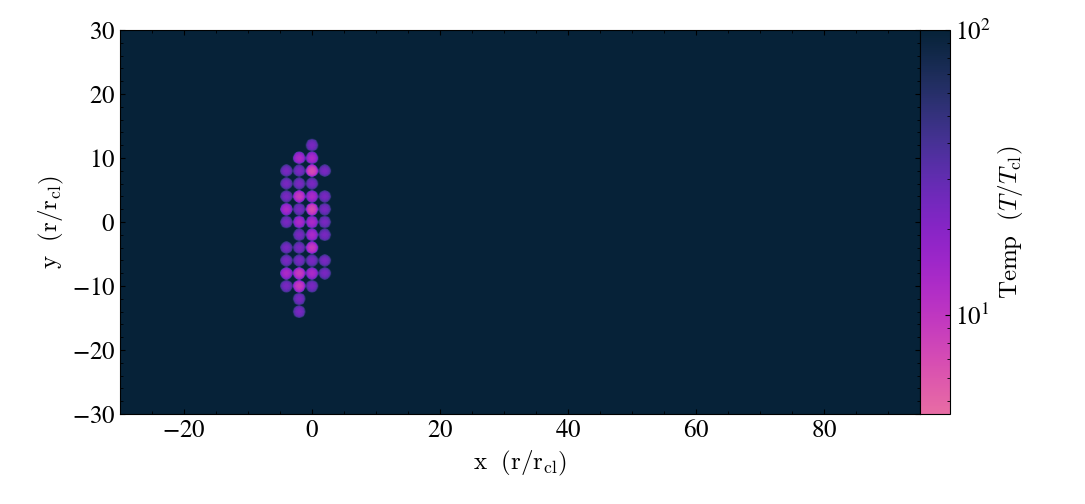

In [9]:
w = float(ds.domain_width.to('r_cl')[0].value)
h = float(ds.domain_width.to('r_cl')[2].value) 
print(w,h)


#slc = yt.SlicePlot(ds, "z", ('athena', 'temp'), origin="native")#, width=((w, "r_cl"),(h, "r_cl")))
#slc2 = yt.SlicePlot(ds, "z",  ('gas','density'), origin="native")#, width=((w, "r_cl"),(h, "r_cl")))
#slc3 = yt.SlicePlot(ds, "z",  ('athena','specific_scalar[0]'))#, origin="native", width=((w, "r_cl"),(h, "r_cl")))
#slc4 = yt.SlicePlot(ds, "z",  ('gas','velocity_x'), origin="native")#, width=((w, "r_cl"),(h, "r_cl")))
#slc5 = yt.SlicePlot(ds, "z",  ('gas','pressure'), origin="native")#, width=((w, "r_cl"),(h, "r_cl")))
slc6 = yt.ProjectionPlot(ds, "z", ('gas','density'), weight_field = ('gas','density'), origin="native", method = "integrate")
slc7 = yt.ProjectionPlot(ds, "z", ('athena', 'temp'), weight_field = ('gas','density'), origin="native", method = "integrate")

#slc2.set_unit( ('gas','density'),'rho_cl')
#slc.set_unit( ('athena', 'temp'),'T_cl')
#slc4.set_unit(('gas','velocity_x'),'v_wind')
#slc5.set_unit(('gas','pressure'),'p0')
slc6.set_unit( ('gas','density'),'rho_cl')
slc7.set_unit(  ('athena', 'temp'),'T_cl')

#slc.set_axes_unit("r_cl")
#slc2.set_axes_unit("r_cl")
#slc3.set_axes_unit("r_cl")
#slc4.set_axes_unit("r_cl")
#slc5.set_axes_unit("r_cl")
slc6.set_axes_unit("r_cl")
slc7.set_axes_unit("r_cl")

#cmr.import_cmaps(r"/u/bseidl/thesis/Python_Utils/Parallel_Images/cm_cloudcrushing.txt")

dens_cmap = cmr.get_sub_cmap('cmr.rainforest', 0.15, .85)
temp_cmap = cmr.get_sub_cmap('cmr.bubblegum_r', 0.25, 1)
scalar_cmap = cmr.get_sub_cmap('cmr.cosmic', 0.3, 1)
velo_cmap = cmr.get_sub_cmap('cmr.torch', 0.2, .8)
press_cmap = cmr.get_sub_cmap('cmr.viola', 0, 1) #or savanna_r

#slc.set_cmap( ('athena','temp'), temp_cmap)
#slc2.set_cmap( ('gas','density'), dens_cmap)
#slc3.set_cmap( ('athena','specific_scalar[0]'), scalar_cmap)
#slc4.set_cmap( ('gas','velocity_x'), velo_cmap)
#slc5.set_cmap( ('gas','pressure'), press_cmap)
slc6.set_cmap( ('gas','density'), dens_cmap)
slc7.set_cmap( ('athena','temp'), temp_cmap)

#slc.set_zlim( ('athena','temp'), 1e0, 2e2)
#slc2.set_zlim( ('gas','density'), 2, 2e-2)
#slc3.set_zlim( ('athena','specific_scalar[0]'), 1e0, 1e-6)
#slc4.set_zlim( ('gas','velocity_x'), 1.1, 0)
#slc5.set_zlim( ('gas','pressure'), 1e1, 1e-1)
slc6.set_zlim(  ('gas','density'), 1e0, 1e-2)
slc7.set_zlim( ('athena','temp'), 1e2, 5e0)

v_wind = 1.5 * sqrt(100) * sqrt(5/3*1)
t_cc = sqrt(100) * 5 / v_wind

timestamp = "{:.2f}".format(float(str(ds.current_time.in_units("t_cc")).removesuffix(" t_cc")))
title =  f"$\chi = 100$, $t= {timestamp} t_{{cc}}$"
#slc.annotate_title(r"{}".format(title))
#slc2.annotate_title(r"{}".format(title))

#slc.annotate_timestamp(corner="upper_left", time_format=r't = {time:.2f} {units}', draw_inset_box=True, time_unit = 't_cc')
#slc.annotate_scale(corner="upper_right")

#slc.show()
#slc2.show()
#slc3.show()
#slc4.show()
#slc5.show() 
slc6.show()
slc7.show()